# Titanic Data Analysis

The objective of this data analysis notebook is to merely understand the various patterns, in as much depth as possible in the Titanic disaster which caused such hefty deaths of passengers in its maiden voyage. 

**None of the efforts can bring back or recover the dent left for the affected families, nor is it intended to hurt any specific individual or organization. **

Post initial set of data analysis and data engineering, this notebook aims to provide predictive capabilities for which users would have survived or not. 

![](https://www.changequest.co.uk/wp-content/uploads/cq_titanic_blog.png)

### 1. Data Loading & Basic Analysis

![](https://www.function1.com/sites/default/files/wp-content/uploads/2013/04/Loading-Data.png)

**Initially we will load the rudimentary libraries and load the data which is already provided to us. If need be, we will add and import more data from other data sources which will be mentioned as we go along. The objective of this section is merely to understand the type/kind of data we have available with us and the bare minimal interpretation.**

In [50]:
# Importing the basic libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pdb
import os

In [51]:
# Loading the data. 
os.listdir('/kaggle/input/titanic/')

['train.csv', 'test.csv', 'gender_submission.csv']

In [52]:
# Loading the training and testing data. 
# we will check how good or bad the data is, that we already have. 
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [53]:
# checking the training and testing data. 
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [54]:
# checking the sample data for training data. 
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [55]:
# for each columns, let's quickly look into the distinct values as well. 
# this is one of the ways in which we can understand any gaps in the data model. 
for each_col in train_data.columns:
    print(each_col)
    print(train_data[each_col].value_counts())
    print("")

PassengerId
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

Survived
0    549
1    342
Name: Survived, dtype: int64

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

Name
Simmons, Mr. John                    1
Kalvik, Mr. Johannes Halvorsen       1
Collyer, Mr. Harvey                  1
Madill, Miss. Georgette Alexandra    1
Zimmerman, Mr. Leo                   1
                                    ..
Maioni, Miss. Roberta                1
Pavlovic, Mr. Stefo                  1
Sadlier, Mr. Matthew                 1
Pettersson, Miss. Ellen Natalia      1
Abbott, Mr. Rossmore Edward          1
Name: Name, Length: 891, dtype: int64

Sex
male      577
female    314
Name: Sex, dtype: int64

Age
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

SibSp
0    608
1    2

In [56]:
# checking basic statistics of training data. 
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
# Checking the information about the data. 
# this will tell us how many and what type of columns/rows we have in the data. 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
# Creating a list of columns which are numeric. 
numeric_cols = list(train_data.select_dtypes(exclude='object').columns)
numeric_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [59]:
# creating a list of columns which are categorical or contains string values. 
string_cols = list(train_data.select_dtypes(include='object').columns)
string_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

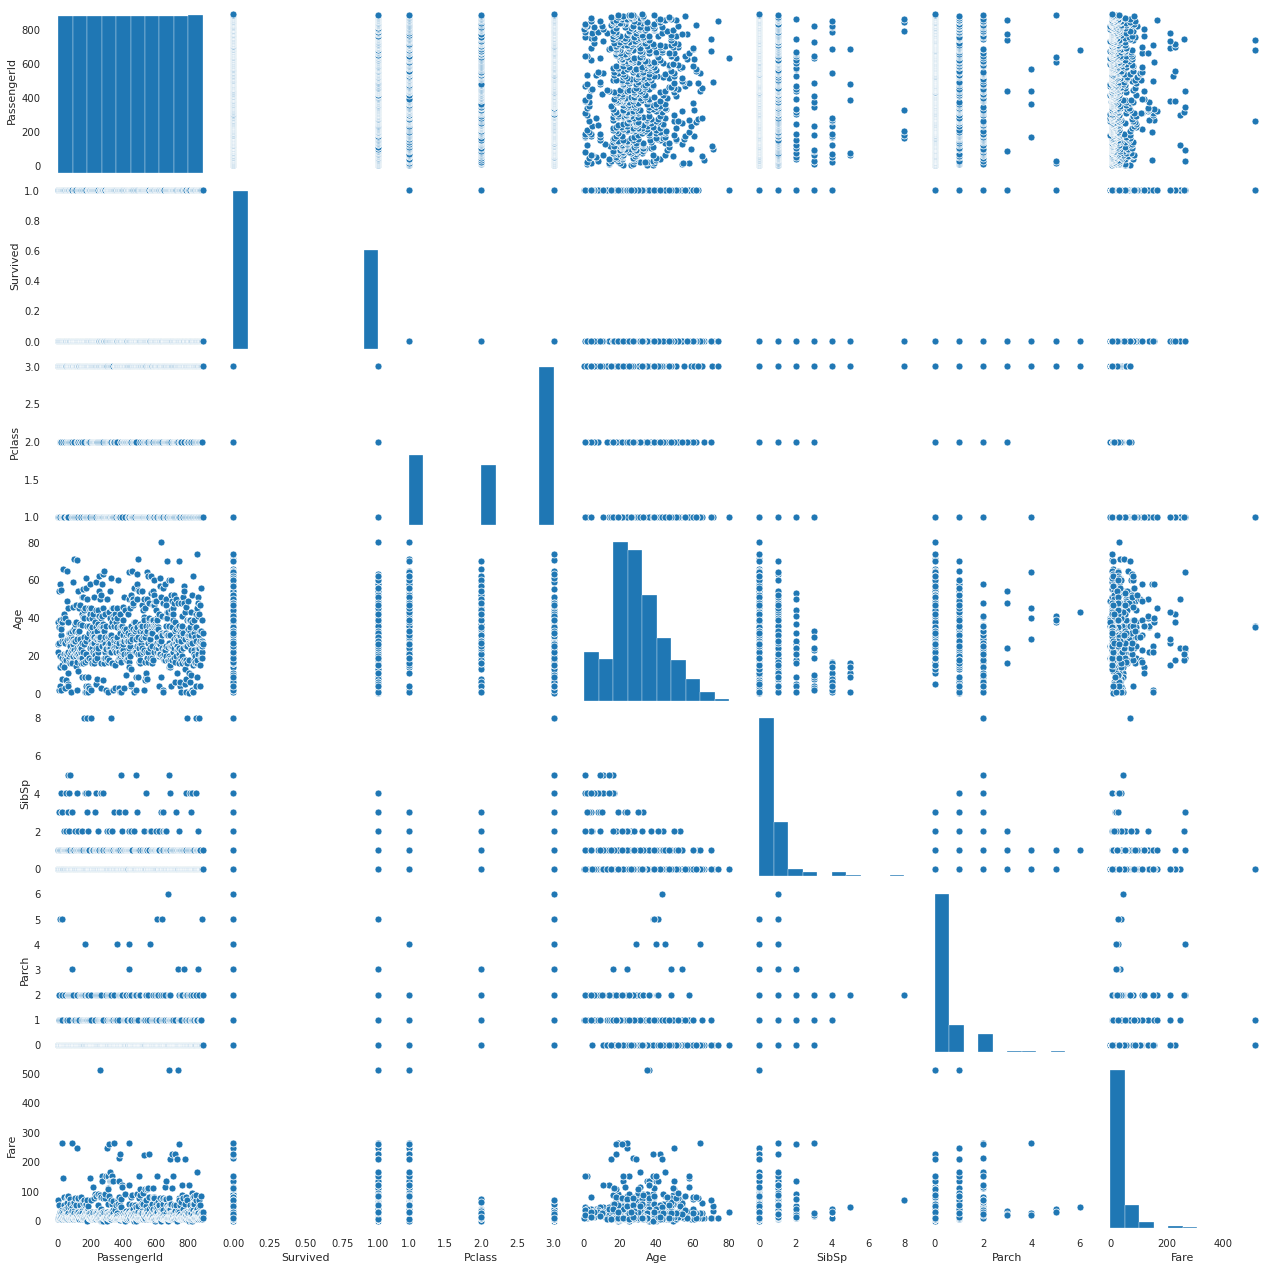

In [60]:
# For each numerical column, let's check the data distribution. 
# for this we are using seaborn library and try performing pairplotting
sns.pairplot(train_data[numeric_cols])
plt.show()

In [61]:
# Clearly we do not need the Passenger ID in this analysis, which we can drop at this stage. 
train_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)

In [62]:
# Creating again, after dropping the passenger ID column, the list of columns which are numeric. 
numeric_cols = list(train_data.select_dtypes(exclude='object').columns)
numeric_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## 2. Data Cleaning & Preparation (Initial)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxMBtILMjt5WI9nc_5szdjxR-CB695P5fEBA&usqp=CAU)

**In this section, we will simply prepare the data using simple targets of removing missing values, finding more columns from existing columns, profiling the data (as a start) to find detailed information about all columns, etc.**

In [63]:
# using pandas profiler once to look into all the data columns. 
train_data_profile = pdb.ProfileReport(train_data)
train_data_profile

In [64]:
## it seems we have some missing values in certain columns. 
## let's look into them again .
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Cabin, Name and Ticket columns are not required for this analysis, since they have very high cardinality and hence they may not result into anything
interesting. However, we can check for data once to see if we can derive new features. 

However, since Cabin column has a lot of missing values, hence there is no point of keeping it for the analysis. 


In [65]:
# dropping the Cabin column.
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [66]:
## Checking the name column. 
train_data['Name'].value_counts().head(20)

Simmons, Mr. John                                           1
Kalvik, Mr. Johannes Halvorsen                              1
Collyer, Mr. Harvey                                         1
Madill, Miss. Georgette Alexandra                           1
Zimmerman, Mr. Leo                                          1
Fynney, Mr. Joseph J                                        1
Astor, Mrs. John Jacob (Madeleine Talmadge Force)           1
Toufik, Mr. Nakli                                           1
de Pelsmaeker, Mr. Alfons                                   1
McCoy, Mr. Bernard                                          1
Slabenoff, Mr. Petco                                        1
Elias, Mr. Dibo                                             1
Adahl, Mr. Mauritz Nils Martin                              1
Lahoud, Mr. Sarkis                                          1
Andersson, Miss. Sigrid Elisabeth                           1
Hagland, Mr. Konrad Mathias Reiersen                        1
Rothes, 

In [67]:
# Let's check the ticket column once. 
train_data['Ticket'].value_counts().head(20)

347082          7
1601            7
CA. 2343        7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
19950           4
113781          4
347077          4
LINE            4
113760          4
4133            4
349909          4
W./C. 6608      4
PC 17757        4
2666            4
17421           4
110152          3
Name: Ticket, dtype: int64

In [68]:
# dropping the ticket column since we could not see any meaningful or logical patterns from the data. 
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

In [69]:
# Re-checking the dataframe information. 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [70]:
# What about the testng data? 
# does it contain missing values as well ? 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [71]:
# filling the missing data of Age in training and testing data. 
for i in train_data.columns[train_data.isnull().any(axis=0)]:
    print(i)
    train_data[i].fillna(train_data[i].mode(),inplace=True)

Age
Embarked


In [72]:
## For the training and testing data, where Age is missing, we can perform imputation using mode
train_data['Age'] = train_data['Age'].fillna((train_data['Age'].mode().astype('float64')))
test_data['Age'] = test_data['Age'].fillna((test_data['Age'].mode().astype('float64')))

In [73]:
# rechecking the training data. 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [74]:
# Looks like the earlier imputation method did not work, hence trying other options. 
from sklearn.impute import SimpleImputer as SI
imr = SI(missing_values=np.nan, strategy='median')
imr = imr.fit(train_data[['Age']])
train_data[['Age']] = imr.transform(train_data[['Age']])

In [75]:
# Checking Age column now. 
train_data['Age'].isna().sum()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [76]:
# Performing similar operation for Embarked column. 
# since it is a categorical column, the 'strategy' will be different. 
imr = SI(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(train_data[['Embarked']])
train_data[['Embarked']] = imr.transform(train_data[['Embarked']])

In [77]:
# rechecking the dataframe information once more. 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [78]:
## Let's repeat the above steps for the Testing data again. 

# for Age column
imr = SI(missing_values=np.nan, strategy='median')
imr = imr.fit(test_data[['Age']])
test_data[['Age']] = imr.transform(test_data[['Age']])

# for Embarked column
imr = SI(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(test_data[['Embarked']])
test_data[['Embarked']] = imr.transform(test_data[['Embarked']])

In [79]:
# Checking the Testing data. 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [80]:
## In the testing data we have Fare data missing. 
## We'll treat it similarly. 

imr = SI(missing_values=np.nan, strategy='median')
imr = imr.fit(test_data[['Fare']])
test_data[['Fare']] = imr.transform(test_data[['Fare']])

In [81]:
# Rechecking the Testing data. 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB
